#**Mostafa Walid Mostafa Radwan - A20000908**

#**General**


For Active User: User1
No_common_users (with at least 30.0% co-rated items): 49
No_coRated_items (with at least 30.0% co-rated users): 1103

For Active User: User2
No_common_users (with at least 30.0% co-rated items): 49
No_coRated_items (with at least 30.0% co-rated users): 1178

For Active User: User3
No_common_users (with at least 30.0% co-rated items): 49
No_coRated_items (with at least 30.0% co-rated users): 1231


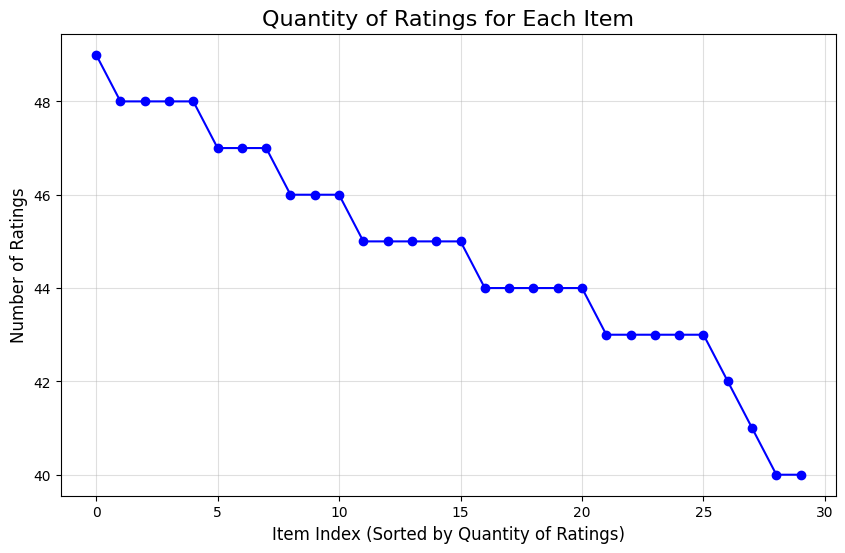

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path, index_col=0)
    df.columns = df.columns.str.strip()
    return df

def count_common_users_and_co_rated_items(user_ratings, active_user, threshold=0.3):
    if active_user not in user_ratings.columns:
        return f"Warning: {active_user} not found in the matrix columns."

    active_user_rated = user_ratings[active_user].notna()

    no_common_users = 0
    no_co_rated_items = 0

    for other_user in user_ratings.columns:
        if active_user == other_user:
            continue

        other_user_rated = user_ratings[other_user].notna()
        common_rated_items = active_user_rated & other_user_rated
        common_count = common_rated_items.sum()

        total_ratings_active_user = active_user_rated.sum()
        percentage_co_rated = common_count / total_ratings_active_user

        if percentage_co_rated >= threshold:
            no_common_users += 1
            no_co_rated_items += common_count

    return {
        'Active_User': active_user,
        'No_common_users': no_common_users,
        'No_coRated_items': no_co_rated_items
    }

def display_results_for_active_users(user_ratings, active_users, threshold=0.3):
    for active_user in active_users:
        result = count_common_users_and_co_rated_items(user_ratings, active_user, threshold)
        if isinstance(result, str):
            print(result)
        else:
            print(f"\nFor Active User: {result['Active_User']}")
            print(f"No_common_users (with at least {threshold*100}% co-rated items): {result['No_common_users']}")
            print(f"No_coRated_items (with at least {threshold*100}% co-rated users): {result['No_coRated_items']}")

def plot_item_ratings(user_ratings):
    item_rating_counts = user_ratings.notna().sum(axis=1)
    sorted_counts = item_rating_counts.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_counts.values, marker='o', linestyle='-', color='b')
    plt.title('Quantity of Ratings for Each Item', fontsize=16)
    plt.xlabel('Item Index (Sorted by Quantity of Ratings)', fontsize=12)
    plt.ylabel('Number of Ratings', fontsize=12)
    plt.grid(alpha=0.4)
    plt.show()

def main():
    user_item_matrix = load_and_preprocess_data('user_item_ratings.csv')

    active_users = ['User1', 'User2', 'User3']

    display_results_for_active_users(user_item_matrix, active_users, threshold=0.3)

    plot_item_ratings(user_item_matrix)

if __name__ == "__main__":
    main()

#**Part 1**

**Case Study 1.1**

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def load_data(file_path):
    data = pd.read_csv(file_path)
    user_item_matrix = data.set_index(data.columns[0]).T
    return user_item_matrix

def compute_similarity(user_item_matrix):
    user_item_filled = user_item_matrix.fillna(0)
    return pd.DataFrame(
        cosine_similarity(user_item_filled),
        index=user_item_filled.index,
        columns=user_item_filled.index
    )

def get_top_n_percent(similarity_row, n=20):
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)
    return sorted_users.iloc[:top_n_cutoff]

def predict_ratings(active_user, similarity_matrix, user_item_matrix, n=20, use_discount=False):
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n)

    if use_discount:
        max_similarity = top_users.max()
        discount_factor = 1 - (top_users / max_similarity)
        discounted_similarity = top_users * (1 - discount_factor)
    else:
        discounted_similarity = top_users

    predictions = {}
    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):
            continue

        numerator = (user_item_matrix[item] * discounted_similarity).sum()
        denominator = discounted_similarity.abs().sum()

        predicted_rating = numerator / denominator if denominator != 0 else 0
        predictions[item] = predicted_rating

    return predictions

def classify_ratings(predictions, threshold=3):
    return {item: ('Like' if rating >= threshold else 'Dislike') for item, rating in predictions.items()}

def analyze_users(user_item_matrix, active_users, similarity_matrix, n=20, threshold=3, use_discount=False):
    for active_user in active_users:
        print(f"\nAnalysis for {active_user}:\n")

        predictions = predict_ratings(active_user, similarity_matrix, user_item_matrix, n, use_discount)
        print(f"Predictions for {active_user}:", predictions)

        classified_predictions = classify_ratings(predictions, threshold)
        print(f"Classified Predictions for {active_user}:", classified_predictions)

def main():

    ratings_file = "user_item_ratings.csv"
    user_item_matrix = load_data(ratings_file)
    similarity_matrix = compute_similarity(user_item_matrix)

    active_users = ["User1", "User2", "User3"]

    analyze_users(user_item_matrix, active_users, similarity_matrix, n=20, threshold=3, use_discount=False)

    analyze_users(user_item_matrix, active_users, similarity_matrix, n=20, threshold=3, use_discount=True)

if __name__ == "__main__":
    main()


Analysis for User1:

Predictions for User1: {'Come the Morning': 2.534482131719024, 'The Perfect Shadow': 2.5114620827470824, "Maybe It's True What They Say About Us": 1.8509512700093147, 'The Problem with People': 2.3552674525712014, 'Amityville: Where the Echo Lives': 2.0550285545440676}
Classified Predictions for User1: {'Come the Morning': 'Dislike', 'The Perfect Shadow': 'Dislike', "Maybe It's True What They Say About Us": 'Dislike', 'The Problem with People': 'Dislike', 'Amityville: Where the Echo Lives': 'Dislike'}

Analysis for User2:

Predictions for User2: {'I giganti del cielo': 2.047197222509709, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 2.166088000898524, 'Power Alley': 2.8397333074613496}
Classified Predictions for User2: {'I giganti del cielo': 'Dislike', "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 'Dislike', 'Power Alley': 'Dislike'}

Analysis for User3:

Predictions for User3: {'Nine Ball': 1.5641825722488452, 'Moe': 2.539599322277086}
Classified Predictions for User3

**Case Study 1.2**

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def load_data(file_path):
    data = pd.read_csv(file_path)
    user_item_matrix = data.set_index(data.columns[0]).T
    return user_item_matrix

def compute_similarity(user_item_matrix):
    user_item_filled = user_item_matrix.fillna(0)
    return pd.DataFrame(
        cosine_similarity(user_item_filled),
        index=user_item_filled.index,
        columns=user_item_filled.index
    )

def get_top_n_percent(similarity_row, n=20):
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)
    return sorted_users.iloc[:top_n_cutoff]

def predict_ratings(active_user, similarity_matrix, user_item_matrix, n=20, use_discount=False):
    top_users = get_top_n_percent(similarity_matrix.loc[active_user], n)

    if use_discount:
        max_similarity = top_users.max()
        discount_factor = 1 - (top_users / max_similarity)
        discounted_similarity = top_users * (1 - discount_factor)
    else:
        discounted_similarity = top_users

    predictions = {}
    for item in user_item_matrix.columns:
        if pd.notna(user_item_matrix.loc[active_user, item]):
            continue

        numerator = (user_item_matrix[item] * discounted_similarity).sum()
        denominator = discounted_similarity.abs().sum()

        predicted_rating = numerator / denominator if denominator != 0 else 0
        predictions[item] = predicted_rating

    return predictions

def classify_ratings(predictions, threshold=3):
    return {item: ('Like' if rating >= threshold else 'Dislike') for item, rating in predictions.items()}

def analyze_users(user_item_matrix, active_users, similarity_matrix, n=20, threshold=3, use_discount=False):
    for active_user in active_users:
        print(f"\nAnalysis for {active_user}:\n")

        predictions = predict_ratings(active_user, similarity_matrix, user_item_matrix, n, use_discount)
        print(f"Predictions for {active_user}:", predictions)

        classified_predictions = classify_ratings(predictions, threshold)
        print(f"Classified Predictions for {active_user}:", classified_predictions)

def main():
    ratings_file = "user_item_ratings.csv"
    user_item_matrix = load_data(ratings_file)
    similarity_matrix = compute_similarity(user_item_matrix)

    active_users = ["User1", "User2", "User3"]

    analyze_users(user_item_matrix, active_users, similarity_matrix, n=20, threshold=3, use_discount=False)

    analyze_users(user_item_matrix, active_users, similarity_matrix, n=20, threshold=3, use_discount=True)

if __name__ == "__main__":
    main()


Analysis for User1:

Predictions for User1: {'Come the Morning': 2.534482131719024, 'The Perfect Shadow': 2.5114620827470824, "Maybe It's True What They Say About Us": 1.8509512700093147, 'The Problem with People': 2.3552674525712014, 'Amityville: Where the Echo Lives': 2.0550285545440676}
Classified Predictions for User1: {'Come the Morning': 'Dislike', 'The Perfect Shadow': 'Dislike', "Maybe It's True What They Say About Us": 'Dislike', 'The Problem with People': 'Dislike', 'Amityville: Where the Echo Lives': 'Dislike'}

Analysis for User2:

Predictions for User2: {'I giganti del cielo': 2.047197222509709, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 2.166088000898524, 'Power Alley': 2.8397333074613496}
Classified Predictions for User2: {'I giganti del cielo': 'Dislike', "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 'Dislike', 'Power Alley': 'Dislike'}

Analysis for User3:

Predictions for User3: {'Nine Ball': 1.5641825722488452, 'Moe': 2.539599322277086}
Classified Predictions for User3

**Case Study 1.3**

In [5]:
import numpy as np
import pandas as pd

def load_data(file_path):
    """Load the user-item ratings dataset and prepare the user-item matrix."""
    data = pd.read_csv(file_path)
    return data.set_index(data.columns[0]).T

def mean_center(user_item_matrix):
    """Mean-Center the user-item matrix."""
    mean_ratings = user_item_matrix.mean(axis=1)
    return user_item_matrix.sub(mean_ratings, axis=0), mean_ratings

def compute_pcc(user_item_matrix):
    """Calculate the Pearson Correlation Coefficient (PCC) between users."""
    mean_centered_matrix, mean_ratings = mean_center(user_item_matrix)
    return mean_centered_matrix.T.corr(method='pearson')

def get_top_n_percent_pcc(similarity_row, n=20):
    """Get the top N% similar users based on PCC."""
    sorted_users = similarity_row.sort_values(ascending=False)
    top_n_cutoff = int(len(sorted_users) * n / 100)
    return sorted_users.iloc[:top_n_cutoff]

def predict_ratings_for_unrated_items(active_user, user_item_matrix, similarity_matrix, mean_ratings, n=20):
    """Predict ratings for unrated items based on Discounted Similarity (DS)."""
    discounted_similarity = compute_discounted_similarity(active_user, similarity_matrix, n)
    predicted_ratings = {}

    for item in user_item_matrix.columns:
        if pd.isna(user_item_matrix.loc[active_user, item]):
            numerator, denominator = 0, 0
            for user, ds in discounted_similarity.items():
                if pd.notna(user_item_matrix.loc[user, item]):
                    numerator += user_item_matrix.loc[user, item] * ds
                    denominator += abs(ds)

            predicted_ratings[item] = mean_ratings[active_user] + (numerator / denominator if denominator != 0 else 0)
    return predicted_ratings

def compute_discounted_similarity(active_user, similarity_matrix, n=20):
    """Compute Discounted Similarity (DS) for the active user."""
    similarity_row = similarity_matrix.loc[active_user]
    top_users = get_top_n_percent_pcc(similarity_row, n)
    max_similarity = top_users.max()

    discounted_similarity = {}
    for user, similarity in top_users.items():
        df = 1 - (similarity / max_similarity)
        ds = similarity * (1 - df)
        discounted_similarity[user] = ds

    return discounted_similarity

def classify_like_dislike(predicted_ratings, threshold=3):
    """Classify whether the active user will like or dislike the item based on the predicted rating."""
    return {item: 'Like' if rating >= threshold else 'Dislike' for item, rating in predicted_ratings.items()}

def analyze_user_predictions(active_users, user_item_matrix, similarity_matrix, mean_ratings, n=20, threshold=3):
    """Perform analysis for each active user and predict ratings with classification."""
    for active_user in active_users:
        print(f"\nAnalysis for {active_user}:")

        predicted_ratings = predict_ratings_for_unrated_items(active_user, user_item_matrix, similarity_matrix, mean_ratings, n)
        print("Predicted Ratings:", predicted_ratings)

        like_dislike = classify_like_dislike(predicted_ratings, threshold)
        print("Like/Dislike Classification:", like_dislike)

ratings_file = "user_item_ratings.csv"
user_item_matrix = load_data(ratings_file)
pcc_matrix = compute_pcc(user_item_matrix)
mean_ratings = user_item_matrix.mean(axis=1)

active_users = ["User1", "User2", "User3"]

analyze_user_predictions(active_users, user_item_matrix, pcc_matrix, mean_ratings)


Analysis for User1:
Predicted Ratings: {'Come the Morning': 6.977152605042631, 'The Perfect Shadow': 4.957398281123277, "Maybe It's True What They Say About Us": 6.442299223377886, 'The Problem with People': 6.644890942887692, 'Amityville: Where the Echo Lives': 7.013027085674745}
Like/Dislike Classification: {'Come the Morning': 'Like', 'The Perfect Shadow': 'Like', "Maybe It's True What They Say About Us": 'Like', 'The Problem with People': 'Like', 'Amityville: Where the Echo Lives': 'Like'}

Analysis for User2:
Predicted Ratings: {'I giganti del cielo': 5.457458082562392, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 6.428213211982612, 'Power Alley': 6.319628054316487}
Like/Dislike Classification: {'I giganti del cielo': 'Like', "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 'Like', 'Power Alley': 'Like'}

Analysis for User3:
Predicted Ratings: {'Nine Ball': 7.838639893165304, 'Moe': 6.952356245999453}
Like/Dislike Classification: {'Nine Ball': 'Like', 'Moe': 'Like'}


#**Part 2**

**Case Study 2.1**

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv("user_item_ratings.csv", index_col=0)

data_filled = data.fillna(0)

cosine_sim = cosine_similarity(data_filled)

cosine_sim_df = pd.DataFrame(cosine_sim, index=data.index, columns=data.index)

def predict_rating_no_df(item, user):
    similar_items = cosine_sim_df[item].sort_values(ascending=False).head(int(len(cosine_sim_df) * 0.25))

    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if rating > 0:
            weighted_ratings += similarity * rating
            similarity_sum += similarity

    if similarity_sum == 0:
        return 0
    return weighted_ratings / similarity_sum

def predict_rating_with_df(item, user, discount_factor_func=None):
    similar_items = cosine_sim_df[item].sort_values(ascending=False).head(int(len(cosine_sim_df) * 0.2))

    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if rating > 0:
            discount_factor = discount_factor_func(similarity) if discount_factor_func else 1
            weighted_ratings += similarity * discount_factor * rating
            similarity_sum += similarity * discount_factor

    if similarity_sum == 0:
        return 0
    return weighted_ratings / similarity_sum

def discount_factor(similarity):
    return 1 / (1 + np.exp(-similarity))

active_users = ['User1', 'User2', 'User3']
target_items = data.index

for user in active_users:
    print(f"\nPredictions for {user}:")
    for item in target_items:
        if pd.isna(data.loc[item, user]):
            pred_no_df = predict_rating_no_df(item, user)
            pred_with_df = predict_rating_with_df(item, user, discount_factor)

            print(f"Item: {item}")
            print(f"Predicted Rating without Discount Factor: {pred_no_df}")
            print(f"Predicted Rating with Discount Factor: {pred_with_df}")


Predictions for User1:
Item: Come the Morning
Predicted Rating without Discount Factor: 3.3442989241961705
Predicted Rating with Discount Factor: 3.2209147475720004
Item: The Perfect Shadow
Predicted Rating without Discount Factor: 3.1709818192083374
Predicted Rating with Discount Factor: 3.4027915502152233
Item: Maybe It's True What They Say About Us
Predicted Rating without Discount Factor: 3.488525444537169
Predicted Rating with Discount Factor: 2.9893840625035826
Item: The Problem with People
Predicted Rating without Discount Factor: 2.6112110206643826
Predicted Rating with Discount Factor: 2.6139776551235494
Item: Amityville: Where the Echo Lives
Predicted Rating without Discount Factor: 2.506550729394105
Predicted Rating with Discount Factor: 2.352830428004009

Predictions for User2:
Item: I giganti del cielo
Predicted Rating without Discount Factor: 2.5983193150108006
Predicted Rating with Discount Factor: 2.501453363057643
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole
Predicte

**Case Study 2.2**

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv("user_item_ratings.csv", index_col=0)

mean_ratings = data.mean(axis=1)

data_centered = data.sub(mean_ratings, axis=0)

cosine_sim = cosine_similarity(data_centered.fillna(0))

cosine_sim_df = pd.DataFrame(cosine_sim, index=data.index, columns=data.index)

def predict_rating_no_df(item, user):
    similar_items = cosine_sim_df[item].sort_values(ascending=False).head(int(len(cosine_sim_df) * 0.2))

    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if not pd.isna(rating):
            weighted_ratings += similarity * rating
            similarity_sum += similarity

    if similarity_sum == 0:
        return np.nan
    return weighted_ratings / similarity_sum

def predict_rating_with_df(item, user, discount_factor_func=None):
    similar_items = cosine_sim_df[item].sort_values(ascending=False).head(int(len(cosine_sim_df) * 0.2))

    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if not pd.isna(rating):
            discount_factor = discount_factor_func(similarity) if discount_factor_func else 1
            weighted_ratings += similarity * discount_factor * rating
            similarity_sum += similarity * discount_factor

    if similarity_sum == 0:
        return np.nan
    return weighted_ratings / similarity_sum

def discount_factor(similarity):
    return 1 / (1 + np.exp(-similarity))

active_users = ['User1', 'User2', 'User3']
target_items = data.index

for user in active_users:
    print(f"\nPredictions for {user}:")
    for item in target_items:
        if pd.isna(data.loc[item, user]):
            pred_no_df = predict_rating_no_df(item, user)
            pred_with_df = predict_rating_with_df(item, user, discount_factor)

            print(f"Item: {item}")
            print(f"Predicted Rating without Discount Factor: {pred_no_df}")
            print(f"Predicted Rating with Discount Factor: {pred_with_df}")


Predictions for User1:
Item: Come the Morning
Predicted Rating without Discount Factor: 3.70196579008071
Predicted Rating with Discount Factor: 3.713687130395767
Item: The Perfect Shadow
Predicted Rating without Discount Factor: 2.4927189660999627
Predicted Rating with Discount Factor: 2.5061930042394516
Item: Maybe It's True What They Say About Us
Predicted Rating without Discount Factor: 3.894107633686491
Predicted Rating with Discount Factor: 3.9039141328748124
Item: The Problem with People
Predicted Rating without Discount Factor: 3.436144920613629
Predicted Rating with Discount Factor: 3.401724784947061
Item: Amityville: Where the Echo Lives
Predicted Rating without Discount Factor: 3.645129493383592
Predicted Rating with Discount Factor: 3.6262249947958076

Predictions for User2:
Item: I giganti del cielo
Predicted Rating without Discount Factor: 2.9626159866965045
Predicted Rating with Discount Factor: 2.979791595101329
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole
Predicted Ra

**Case Study 2.3**

In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv("user_item_ratings.csv", index_col=0)

def pearson_correlation(item1, item2):
    mean_item1 = data.loc[item1].mean()
    mean_item2 = data.loc[item2].mean()

    ratings_item1 = data.loc[item1] - mean_item1
    ratings_item2 = data.loc[item2] - mean_item2

    numerator = np.sum(ratings_item1 * ratings_item2)
    denominator = np.sqrt(np.sum(ratings_item1**2)) * np.sqrt(np.sum(ratings_item2**2))
    return numerator / denominator if denominator != 0 else 0

items = data.index
pcc_matrix = pd.DataFrame(index=items, columns=items)

for item1 in items:
    for item2 in items:
        pcc_matrix.loc[item1, item2] = pearson_correlation(item1, item2)

def predict_rating_no_df(item, user):
    similar_items = pcc_matrix[item].sort_values(ascending=False).head(int(len(pcc_matrix) * 0.2))

    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if not pd.isna(rating):
            weighted_ratings += similarity * rating
            similarity_sum += similarity

    if similarity_sum == 0:
        return np.nan
    return weighted_ratings / similarity_sum

def discount_factor(pcc):
    return 1 / (1 + np.exp(-pcc))

def predict_rating_with_df(item, user, discount_factor_func=discount_factor):
    similar_items = pcc_matrix[item].sort_values(ascending=False).head(int(len(pcc_matrix) * 0.2))

    weighted_ratings = 0
    similarity_sum = 0
    for similar_item, similarity in similar_items.items():
        rating = data.loc[similar_item, user]
        if not pd.isna(rating):
            discounted_similarity = discount_factor_func(similarity)
            weighted_ratings += discounted_similarity * rating
            similarity_sum += discounted_similarity

    if similarity_sum == 0:
        return np.nan
    return weighted_ratings / similarity_sum

active_users = ['User1', 'User2', 'User3']
items = data.index

for user in active_users:
    print(f"\nPredictions for {user}:")
    for item in items:
        if pd.isna(data.loc[item, user]):
            pred_no_df = predict_rating_no_df(item, user)
            pred_with_df = predict_rating_with_df(item, user)

            print(f"Item: {item}")
            print(f"Predicted Rating without Discount Factor: {pred_no_df}")
            print(f"Predicted Rating with Discount Factor: {pred_with_df}")


Predictions for User1:
Item: Come the Morning
Predicted Rating without Discount Factor: 3.7019657900807093
Predicted Rating with Discount Factor: 3.610016336074027
Item: The Perfect Shadow
Predicted Rating without Discount Factor: 2.4927189660999627
Predicted Rating with Discount Factor: 2.407424740363386
Item: Maybe It's True What They Say About Us
Predicted Rating without Discount Factor: 3.894107633686491
Predicted Rating with Discount Factor: 3.759805114124726
Item: The Problem with People
Predicted Rating without Discount Factor: 3.43614492061363
Predicted Rating with Discount Factor: 3.718516592136105
Item: Amityville: Where the Echo Lives
Predicted Rating without Discount Factor: 3.6451294933835925
Predicted Rating with Discount Factor: 3.785359991098569

Predictions for User2:
Item: I giganti del cielo
Predicted Rating without Discount Factor: 2.962615986696505
Predicted Rating with Discount Factor: 2.774797515434346
Item: L'homme au bÃ¢ton, une lÃ©gende crÃ©ole
Predicted Rati